In [0]:
import numpy as np
import matplotlib.pyplot as plt
import gym
from gym import spaces
%matplotlib inline

#Part 1 - Build a deterministic environment


In [0]:
#Grid Environment
class GridDeterministicEnvironment(gym.Env):
    metadata = { 'render.modes': [] }
    
    def __init__(self):
        self.observation_space = spaces.Box(0, 4, (4,))
        self.action_space = spaces.Discrete(4)
        self.max_timesteps = 100
        
    def reset(self):
        self.timestep = 0
        self.agent_pos = [0, 0]
        self.goal_pos = [4, 4]

        self.neg_rew1 = [0, 4]
        self.neg_rew2 = [4, 3]
        self.neg_rew3 = [2, 2]
        
        self.state = np.zeros((5,5))
        self.state[tuple(self.agent_pos)] = 1
        self.state[tuple(self.goal_pos)] = 0.5

        self.state[tuple(self.neg_rew1)] = 0.3
        self.state[tuple(self.neg_rew2)] = 0.3
        self.state[tuple(self.neg_rew3)] = 0.3

        observation = self.state.flatten()
        return observation
    
    def step(self, action):
        if action == 0:
          self.agent_pos[0] += 1
        if action == 1:
          self.agent_pos[0] -= 1
        if action == 2:
          self.agent_pos[1] += 1
        if action == 3:
          self.agent_pos[1] -= 1
          
        self.agent_pos = np.clip(self.agent_pos, 0, 4)
        self.state = np.zeros((5,5))
        
        self.state[tuple(self.neg_rew1)] = 0.3
        self.state[tuple(self.neg_rew2)] = 0.3
        self.state[tuple(self.neg_rew3)] = 0.3

        self.state[tuple(self.goal_pos)] = 0.5
        self.state[tuple(self.agent_pos)] = 1
       
        observation = self.agent_pos
        reward = 0
        if (self.agent_pos == self.goal_pos).all():
          reward = 10
          #done = True
        elif (self.agent_pos == self.neg_rew1).all():
          reward = -2
        elif (self.agent_pos == self.neg_rew2).all():
          reward = -3
        elif (self.agent_pos == self.neg_rew3).all():
          reward = -5
        else:
          reward = -1        
        self.timestep += 1

        done = True if (self.timestep >= self.max_timesteps) or (abs(self.agent_pos[0] - self.goal_pos[0]) + abs(self.agent_pos[1] - self.goal_pos[1]) == 0) else False
        info = {}
        
        return observation, reward, done, info
        
    def render(self):
        plt.imshow(self.state)

###Testing the deterministic environment

Reward: -1


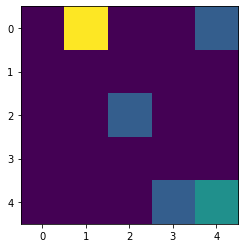

In [3]:
env = GridDeterministicEnvironment()
env.reset()
action = 2
observation, reward, done, info = env.step(action)
env.render()
print('Reward:', reward)

#Part 2 - Build a stochastic environment

In [0]:
#Grid Environment
class GridStochasticEnvironment(gym.Env):
    metadata = { 'render.modes': [] }
    
    def __init__(self):
        self.observation_space = spaces.Box(0, 4, (4,))
        self.action_space = spaces.Discrete(4)
        self.max_timesteps = 50
        
    def reset(self):
        self.timestep = 0
        self.agent_pos = [0, 0]
        self.goal_pos = [4, 4]

        self.neg_rew1 = [0, 4]
        self.neg_rew2 = [4, 3]
        self.neg_rew3 = [2, 2]
        
        self.state = np.zeros((5,5))
        self.state[tuple(self.agent_pos)] = 1
        self.state[tuple(self.goal_pos)] = 0.5

        self.state[tuple(self.neg_rew1)] = 0.3
        self.state[tuple(self.neg_rew2)] = 0.3
        self.state[tuple(self.neg_rew3)] = 0.3

        observation = self.state.flatten()
        return observation
      
    def step(self, action):
        actions = {'down':0, 'up':1, 'right':2, 'left':3}
        action1 = None
        if action == 0:#Down
          action1 = np.random.choice(list(actions.keys()), p = [0.85, 0.05, 0.05, 0.05])
        if action == 1:#Up
          action1 = np.random.choice(list(actions.keys()), p = [0.05, 0.85, 0.05, 0.05])
        if action == 2:#Right
          action1 = np.random.choice(list(actions.keys()), p = [0.05, 0.05, 0.85, 0.05])
        if action == 3:#Left
          action1 = np.random.choice(list(actions.keys()), p = [0.05, 0.05, 0.05, 0.85])
        #print(action1)

        action2 = actions[action1]
        if action2 == 0:
          self.agent_pos[0] += 1
        if action2 == 1:
          self.agent_pos[0] -= 1
        if action2 == 2:
          self.agent_pos[1] += 1
        if action2 == 3:
          self.agent_pos[1] -= 1
          
        self.agent_pos = np.clip(self.agent_pos, 0, 4)
        self.state = np.zeros((5,5))
        
        self.state[tuple(self.neg_rew1)] = 0.3
        self.state[tuple(self.neg_rew2)] = 0.3
        self.state[tuple(self.neg_rew3)] = 0.3

        self.state[tuple(self.goal_pos)] = 0.5
        self.state[tuple(self.agent_pos)] = 1

        observation = self.agent_pos
        
        reward = 0
        if (self.agent_pos == self.goal_pos).all():
          reward = 10
          #done = True
        elif (self.agent_pos == self.neg_rew1).all():
          reward = -2
        elif (self.agent_pos == self.neg_rew2).all():
          reward = -3
        elif (self.agent_pos == self.neg_rew3).all():
          reward = -5
        else:
          reward = -1        
        
        self.timestep += 1
        done = True if (self.timestep >= self.max_timesteps) or (abs(self.agent_pos[0] - self.goal_pos[0]) + abs(self.agent_pos[1] - self.goal_pos[1]) == 0) else False
        info = {}
        
        return observation, reward, done, info
        
    def render(self):
        plt.imshow(self.state)

###Testing the stochastic environment

Reward: -1


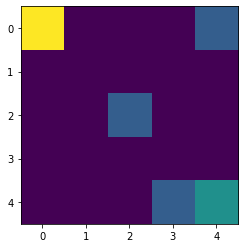

In [5]:
env = GridStochasticEnvironment()
env.reset()
action = 2
observation, reward, done, info = env.step(action)
env.render()
print('Reward:', reward)

#Part 3 - Q-Learning

In [0]:
class Q_Learning_Agent:
    def __init__(self, env, epsilon, learning_rate, gamma):
        self.env = env
        self.observation_space = env.observation_space
        self.action_space = env.action_space
        self.q_table = np.zeros((5, 5, 4))
        self.epsilon = epsilon
        self.learning_rate = learning_rate
        self.gamma = gamma

    def step(self, state):
        state = state.astype(int)
        action = self.action_space.sample() if np.random.uniform(0, 1) < self.epsilon else np.argmax(self.q_table[state[0], state[1]])
        return action
  
    def update(self, state, action, reward, nextState):
        state, nextState = state.astype(int), nextState.astype(int)
        #print (state, nextState)
        oldValue = self.q_table[state[0], state[1], action]
        maxAction = np.max(self.q_table[nextState[0], nextState[1]])
        self.q_table[state[0], state[1], action] =  oldValue + self.learning_rate * (reward + self.gamma * maxAction - oldValue)
        #print(new_value)

In [0]:
def train_agent(env, agent, episodes, decay):
  e1 = agent.epsilon * decay
  total_rewards, epsilons, timesteps = [], [], []

  for i in range (episodes):
      state = env.reset()
      done, current_rewards, timestep = False, 0, 0
      while not done:
          #Step
          #Get action based on agent policy
          action = agent.step(state)
          #Make action on the env
          next_state, reward, done, _ = env.step(action)
          #print('State:', state, 'Next_State:', next_state)

          #Update
          #Update the q table
          agent.update(state, action, reward, next_state)
          state = next_state.copy()
          current_rewards += reward
          timestep += 1
          

      #Store for plotting    
      timesteps.append(timestep)
      total_rewards.append(current_rewards)
      #Epsilon Decay
      tmp = np.exp(-1 * e1 * i)
      epsilons.append(tmp)
      agent.epsilon = tmp

  print(agent.q_table)
  return agent, epsilons, total_rewards, timesteps

def testAgent(env, agent):
  observation = env.reset()
  done = False
  agent.epsilon = 0
  env.render()
  plt.show()
  while not done:
      action = agent.step(observation)
      observation, reward, done, _ = env.step(action)
      env.render()
      plt.show()

##Plot Graphs

In [0]:
def plotEpsilon(epsilons):
  plt.plot(epsilons)
  plt.xlabel('Episode')
  plt.ylabel('Epsilon')
  plt.show()

def plotRewards(total_rewards):
  plt.plot(total_rewards)
  plt.xlabel('Episode')
  plt.ylabel('Total Reward (per episode)')
  plt.show()

def plot1(epsilons, total_rewards):
  plt.plot(epsilons, total_rewards)
  plt.xlabel('Epsilon')
  plt.ylabel('Total Reward (per episode)')
  plt.show()

def plotTimesteps(timesteps):
  plt.plot(timesteps)
  plt.xlabel('Episode')
  plt.ylabel('Timesteps')
  plt.show()

#Training and testing on deterministic environment

In [0]:
epsilon  = 1.0
learning_rate = 0.1
gamma = 0.9
episodes = 500
decay = 0.01

[[[-3.16631121 -3.13948191 -0.76296649 -3.20310414]
  [-0.93827967 -1.9045854   0.62882    -2.83461543]
  [ 0.01286663 -0.27432254  1.8098     -1.6793864 ]
  [ 3.122       0.03095999 -1.63097918 -0.62192376]
  [ 2.07412108 -1.39285998 -1.21599754 -1.28768855]]

 [[-2.26562744 -2.74898125 -0.43406199 -2.91358615]
  [-2.19249624 -2.36572639  1.38315461 -3.11032246]
  [-4.68796828 -1.89329851  3.08918077 -2.12195228]
  [ 4.58        0.83817577  3.12153202  0.68513141]
  [ 6.01201688 -1.70682867 -0.38905813 -0.26153124]]

 [[-1.99343484 -2.60679617 -2.00425187 -2.01840226]
  [-1.71604956 -2.01338884 -4.50077792 -2.02206492]
  [-1.02970557 -1.19150881  3.28331947 -1.94324231]
  [ 5.31265152  1.67177733  6.2        -3.19464162]
  [ 8.          2.07306205  5.13745215  2.9879927 ]]

 [[-1.59145562 -1.99787758 -1.54347496 -1.54913785]
  [-1.03502126 -1.99731075 -0.4496244  -1.42971141]
  [ 0.10159497 -4.57634888  2.40384947 -1.16750901]
  [ 2.38484164  1.12497255  7.96295038 -0.52874487]
  [10.

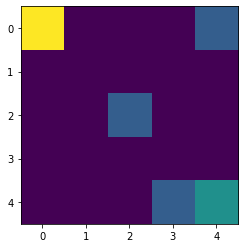

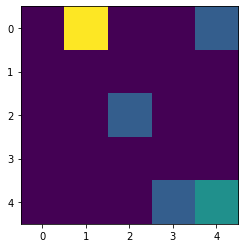

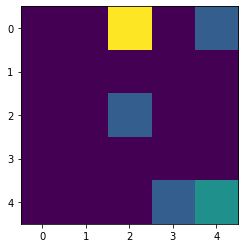

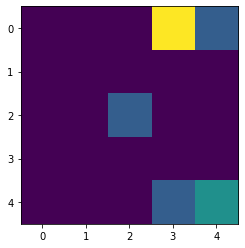

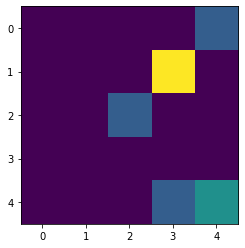

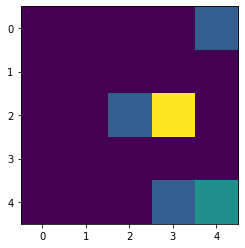

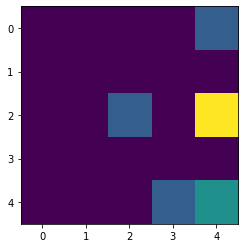

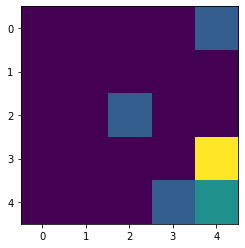

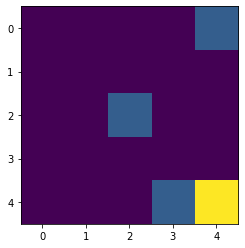

In [10]:
deterministic_env = GridDeterministicEnvironment()
agent = Q_Learning_Agent(deterministic_env, epsilon, learning_rate, gamma)
#Train
agent, epsilons, total_rewards, timesteps = train_agent(deterministic_env, agent, episodes, decay)

#Test
testAgent(deterministic_env, agent)

##Plot

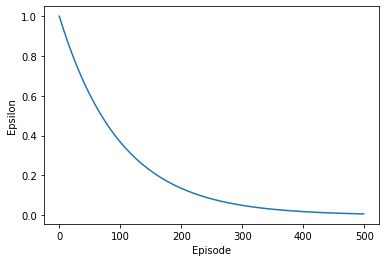

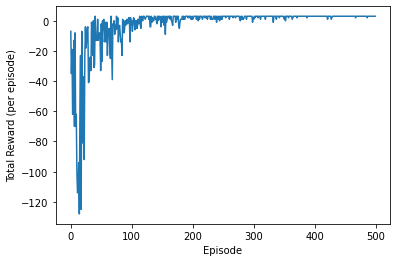

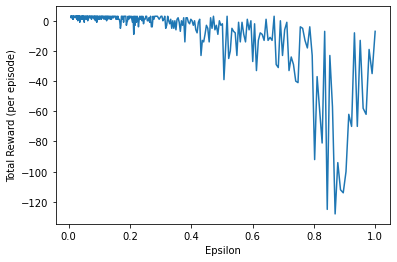

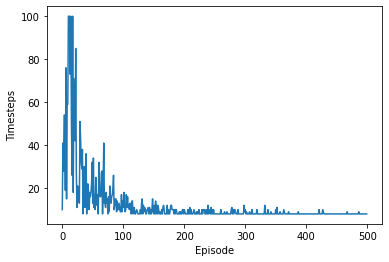

In [11]:
plotEpsilon(epsilons)
plotRewards(total_rewards)
plot1(epsilons, total_rewards)
plotTimesteps(timesteps)

##Training and testing on stochastic environment

[[[-3.76160456 -3.73977686 -2.38222064 -3.76690878]
  [-2.54120936 -3.03677902 -1.54655137 -3.4079538 ]
  [-1.76202492 -1.73720749 -0.25700503 -2.26300256]
  [ 1.40835757 -0.98640665 -1.10563961 -1.5859444 ]
  [ 2.79477389 -1.51442521 -1.64007132 -1.29880868]]

 [[-3.49444209 -3.80094761 -2.30168923 -3.74785345]
  [-0.43435318 -2.96091538 -2.03853715 -3.0500523 ]
  [-4.55689139 -2.45316096  0.54028031 -2.49428981]
  [ 3.30878031 -0.2200708   1.49765626 -0.91594199]
  [ 4.9549614   0.30352236  2.50714785  0.68594804]]

 [[-0.39566623 -2.97320734 -2.25467725 -2.3253339 ]
  [ 1.15278756 -2.29021502 -3.41434271 -2.19457421]
  [ 0.12590912 -1.3974986   2.36391838 -1.12755463]
  [ 1.34791759 -0.08669775  5.27250139 -3.3909863 ]
  [ 7.45624465  2.19607286  4.31807518  1.2945543 ]]

 [[-1.88871141 -1.96742446  1.0816478  -1.94236581]
  [-1.54618247 -1.44797077  2.97411571 -1.80522722]
  [-0.66791481 -3.98226973  4.34877779 -0.95879076]
  [ 2.63854448  0.80312488  6.71534539  1.46380938]
  [ 9.

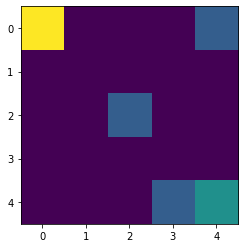

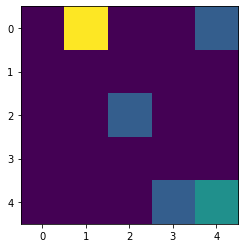

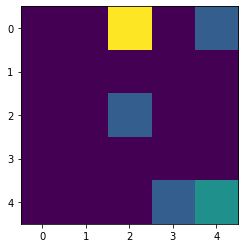

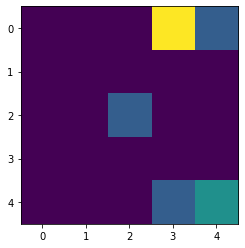

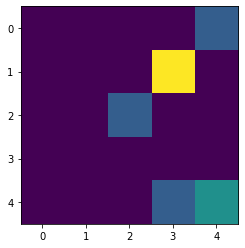

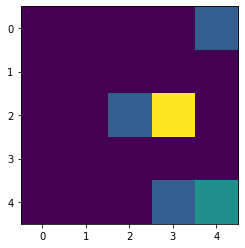

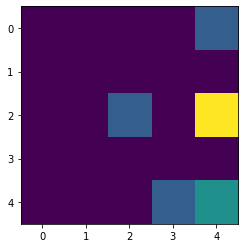

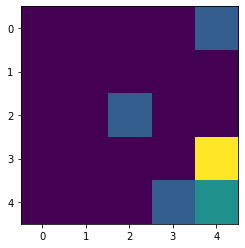

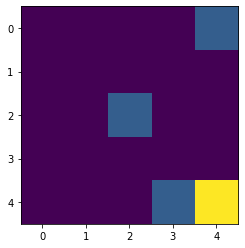

In [12]:
episodes1 = 5000

stochastic_env = GridStochasticEnvironment()
agent1 = Q_Learning_Agent(stochastic_env, epsilon, learning_rate, gamma)
#Train
agent1, epsilons1, total_rewards1, timesteps1 = train_agent(stochastic_env, agent1, episodes1, decay)

#Test
testAgent(stochastic_env, agent1)

#Plot

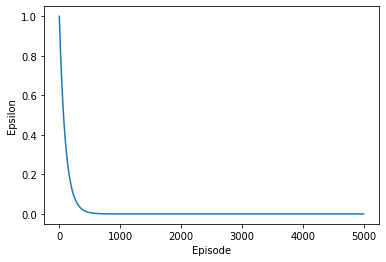

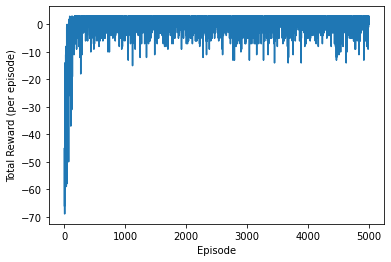

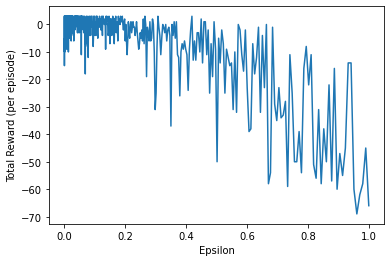

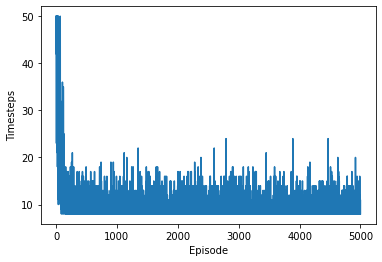

In [13]:
plotEpsilon(epsilons1)
plotRewards(total_rewards1)
plot1(epsilons1, total_rewards1)
plotTimesteps(timesteps1)